In [175]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from scipy import stats
from sklearn.preprocessing import normalize
from tensorflow.keras import layers
from tensorflow import keras
from keras import backend as K

Using TensorFlow backend.


In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

test_data_scaled = test_data.copy()
train_data_scaled = train_data.copy()

print(test_data)
print(test_data_scaled)
test_data.dtypes
# test_data.values

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [3]:
scaler = MinMaxScaler()

test_data_scaled[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(test_data_scaled[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])

print(test_data_scaled)
print(test_data)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.078865           0.000000    0.157088          0.746835   
1

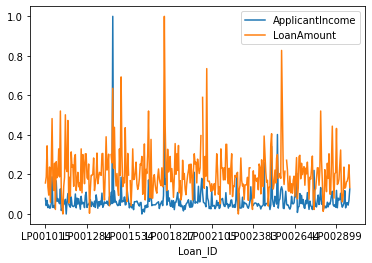

In [4]:
ax = plt.gca()

test_data_scaled.plot(kind='line', x='Loan_ID', y='ApplicantIncome', ax=ax)
# test_data.plot(kind='line', x='Loan_ID', y='CoapplicantIncome', ax=ax)
test_data_scaled.plot(kind='line', x='Loan_ID', y='LoanAmount', ax=ax)

plt.show()

In [5]:
print(train_data_scaled)
print(train_data)
train_data.dtypes

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train_data_scaled[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(train_data_scaled[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])

print(train_data_scaled)
print(train_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000         NaN          0

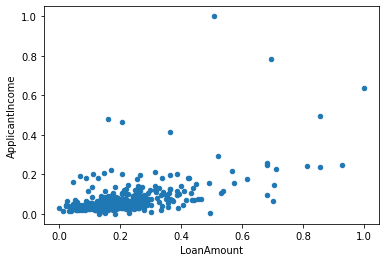

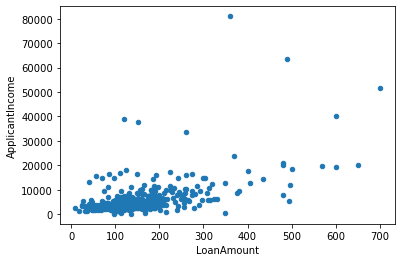

In [7]:
ay = plt.gca()

train_data_scaled.plot(kind='scatter',x='LoanAmount',y='ApplicantIncome',ax=ay)
# train_data.plot(kind='line',x='Loan_ID',y='CoapplicantIncome',ax=ay)

plt.show()

az = plt.gca()

train_data.plot(kind='scatter',x='LoanAmount',y='ApplicantIncome',ax=az)

plt.show()


In [8]:
###### Cek data NaN #######

In [9]:
##### Cek NaN data test #####

test_data[test_data.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,NaN,Urban
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban


In [10]:
a = test_data.count()
print(a)

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64


In [11]:
b = test_data['Gender'].value_counts()
print(b)
test_data = test_data.fillna({'Gender':'Male'})

Male      286
Female     70
Name: Gender, dtype: int64


In [12]:
c = test_data['Dependents'].value_counts()
print(c)
test_data = test_data.fillna({'Dependents':'0'})

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [13]:
d = test_data['Self_Employed'].value_counts()
print(d)
test_data = test_data.fillna({'Self_Employed':'No'})

No     307
Yes     37
Name: Self_Employed, dtype: int64


In [14]:
e = test_data['LoanAmount'].value_counts()
print(e)
test_data = test_data.fillna({'LoanAmount':150.0})

####### Checkj thiss later !!!

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64


In [15]:
f = test_data['Loan_Amount_Term'].value_counts()
print(f)
test_data = test_data.fillna({'Loan_Amount_Term':360.0})

####### Checkj thiss later !!!

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64


In [16]:
g = test_data['Credit_History'].value_counts()
print(g)
test_data = test_data.fillna({'Credit_History':1.0})

1.0    279
0.0     59
Name: Credit_History, dtype: int64


In [17]:
##### Cek NaN data train #####

train_data[train_data.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [18]:
h = train_data.count()
print(h)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64


In [19]:
i = train_data['Gender'].value_counts()
print(i)
train_data = train_data.fillna({'Gender':'Male'})

Male      489
Female    112
Name: Gender, dtype: int64


In [20]:
j = train_data['Married'].value_counts()
print(j)
train_data = train_data.fillna({'Married':'Yes'})

Yes    398
No     213
Name: Married, dtype: int64


In [21]:
k = train_data['Dependents'].value_counts()
print(k)
train_data = train_data.fillna({'Dependents':'0'})

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [22]:
l = train_data['Self_Employed'].value_counts()
print(l)
train_data = train_data.fillna({'Self_Employed':'No'})

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [23]:
m = train_data['LoanAmount'].value_counts()
print(m)
train_data = train_data.fillna({'LoanAmount':120.0})

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


In [24]:
n = train_data['Loan_Amount_Term'].value_counts()
print(n)
train_data = train_data.fillna({'Loan_Amount_Term':360.0})

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [25]:
o = train_data['Credit_History'].value_counts()
print(o)
train_data = train_data.fillna({'Credit_History':1.0})

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [26]:
##### Encode to binary ######

In [216]:
##### Encode to binary data test 

eb = pd.get_dummies(test_data, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
print(eb)
print(eb.dtypes)

x_val_all = eb.copy()
x_val = x_val_all.drop(columns=['Loan_ID'])
print(x_val.shape)

x_val_np = x_val.to_numpy().astype('float64')
x_val_norm = normalize(x_val_np)
print(x_val_norm.shape)

      Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001015             5720                  0       110.0   
1    LP001022             3076               1500       126.0   
2    LP001031             5000               1800       208.0   
3    LP001035             2340               2546       100.0   
4    LP001051             3276                  0        78.0   
..        ...              ...                ...         ...   
362  LP002971             4009               1777       113.0   
363  LP002975             4158                709       115.0   
364  LP002980             3250               1993       126.0   
365  LP002986             5000               2393       158.0   
366  LP002989             9200                  0        98.0   

     Loan_Amount_Term  Credit_History  Gender_Female  Gender_Male  Married_No  \
0               360.0             1.0              0            1           0   
1               360.0             1.0              0     

In [132]:
##### Encode to binary data train

# fb = pd.get_dummies(train_data, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
fb = pd.get_dummies(train_data, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
print(fb)
print(fb.dtypes)

#### khusus column loan_status will be converted from y/n into 1/0 bcs it will be used as target in learning procedure

replace_loanstat = {'Loan_Status': {'Y':1.0,'N':0.0}}
fb.replace(replace_loanstat, inplace=True)
print(fb)
print(fb.dtypes)

      Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001002             5849                0.0       120.0   
1    LP001003             4583             1508.0       128.0   
2    LP001005             3000                0.0        66.0   
3    LP001006             2583             2358.0       120.0   
4    LP001008             6000                0.0       141.0   
..        ...              ...                ...         ...   
609  LP002978             2900                0.0        71.0   
610  LP002979             4106                0.0        40.0   
611  LP002983             8072              240.0       253.0   
612  LP002984             7583                0.0       187.0   
613  LP002990             4583                0.0       133.0   

     Loan_Amount_Term  Credit_History Loan_Status  Gender_Female  Gender_Male  \
0               360.0             1.0           Y              0            1   
1               360.0             1.0           N        

In [153]:
##### separate x and y, train and test

#### data fb

x_all = fb.copy()
# print(x_all)

x = x_all.drop(columns=['Loan_ID','Loan_Status'])
y = x_all['Loan_Status']
# print(x)
# print(y)

##### convert to numpy
x_np = x.to_numpy().astype('float64')
y_np = y.to_numpy().astype('float64')
# print(x_np)
# print(y_np)

# norm = Normalization(axis=-1)
# norm.adapt(x_np)
# x_np_norm = norm(x_np)

# norm = Normalization(axis=-1)
# norm.adapt(y_np)
# y_np_norm = norm(y_np)

x_np_norm = normalize(x_np)
# y_np_norm = normalize(y_np)

print(x_np_norm)
# print(y_np_norm)

##### split into x_tr, x_te, y_tr, y_te
x_train, x_test, y_train, y_test = train_test_split(x_np_norm,y_np,train_size=0.60)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# print(x_train.shape[-1])

##### insert into tf dataset
# train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
# test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))

[[9.97901921e-01 0.00000000e+00 2.04732827e-02 ... 0.00000000e+00
  0.00000000e+00 1.70610689e-04]
 [9.46934297e-01 3.11581261e-01 2.64472158e-02 ... 2.06618874e-04
  0.00000000e+00 0.00000000e+00]
 [9.92639678e-01 0.00000000e+00 2.18380729e-02 ... 0.00000000e+00
  0.00000000e+00 3.30879893e-04]
 ...
 [9.98077788e-01 2.96752563e-02 3.12826660e-02 ... 0.00000000e+00
  0.00000000e+00 1.23646901e-04]
 [9.98572016e-01 0.00000000e+00 2.46252099e-02 ... 0.00000000e+00
  0.00000000e+00 1.31685615e-04]
 [9.96511960e-01 0.00000000e+00 2.89190685e-02 ... 0.00000000e+00
  2.17436605e-04 0.00000000e+00]]
(368, 20) (368,)
(246, 20) (246,)


In [190]:
##### build model

# model = keras.Sequential()
# model.add = layers.Dense(100, input_dim=row_x_train, activation='sigmoid')
# model = keras.Sequential(
#     [
#         layers.Dense(100, activation="sigmoid", input_shape=(x_train.shape[-1],)),
#         layers.Dense(50, activation="sigmoid"),
#         layers.Dense(2, activation="sigmoid"),
#     ]
# )
inputs = tf.keras.Input(shape=(x_train.shape[-1],))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.5, momentum=0.02, nesterov=False, name="SGD"), 
              loss=keras.losses.MeanSquaredError(),
             metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")])

model.fit(x_train,y_train,batch_size=92,epochs=1000)

print('val')
model.fit(x_test,y_test,batch_size=1,epochs=1)

model.layers[2].output.get_shape()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 20)]              0         
_________________________________________________________________
dense_106 (Dense)            (None, 100)               2100      
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2378 - acc: 0.3179
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2210 - acc: 0.3179
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2178 - acc: 0.3179
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2174 - acc: 0.3179
Epoch 5/1000
4

4/4 [==============================] - 0s 994us/step - loss: 0.2162 - acc: 0.3179
Epoch 81/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - acc: 0.3179
Epoch 82/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - acc: 0.3179
Epoch 83/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2164 - acc: 0.3179
Epoch 84/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.3179
Epoch 85/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - acc: 0.3179
Epoch 86/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.3179
Epoch 87/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2165 - acc: 0.3179
Epoch 88/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2161 - acc: 0.3179
Epoch 89/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2164 - acc: 0.3179
Epoch 90/1000
4/4 [==============================] - 0s 1ms/step - los

4/4 [==============================] - 0s 1ms/step - loss: 0.2163 - acc: 0.3179
Epoch 167/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.3179
Epoch 168/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2164 - acc: 0.3179
Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2164 - acc: 0.3179
Epoch 170/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2163 - acc: 0.3179
Epoch 171/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2160 - acc: 0.3179
Epoch 172/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2168 - acc: 0.3179
Epoch 173/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2163 - acc: 0.3179
Epoch 174/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.3179
Epoch 175/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.3179
Epoch 176/1000
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.3179
Epoch 253/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2163 - acc: 0.3179
Epoch 254/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.3179
Epoch 255/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - acc: 0.3179
Epoch 256/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.3179
Epoch 257/1000
4/4 [==============================] - ETA: 0s - loss: 0.2233 - acc: 0.337 - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 258/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 259/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.3179
Epoch 260/1000
4/4 [==============================] - 0s 997us/step - loss: 0.2163 - acc: 0.3179
Epoch 261/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2171 - acc: 0.3179
Epoch 262/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.3179
Epoch 338/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 339/1000
4/4 [==============================] - 0s 868us/step - loss: 0.2158 - acc: 0.3179
Epoch 340/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 341/1000
4/4 [==============================] - 0s 985us/step - loss: 0.2159 - acc: 0.3179
Epoch 342/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2164 - acc: 0.3179
Epoch 343/1000
4/4 [==============================] - 0s 869us/step - loss: 0.2162 - acc: 0.3179
Epoch 344/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2163 - acc: 0.3179
Epoch 345/1000
4/4 [==============================] - 0s 987us/step - loss: 0.2160 - acc: 0.3179
Epoch 346/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 347/1000
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 424/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 425/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2156 - acc: 0.3179
Epoch 426/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 427/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 428/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 429/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 430/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - acc: 0.3179
Epoch 431/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2156 - acc: 0.3179
Epoch 432/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2155 - acc: 0.3179
Epoch 433/1000
4/4 [==============================] - 0s 1ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 510/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156 - acc: 0.3179
Epoch 511/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 512/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158 - acc: 0.3179
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2155 - acc: 0.3179
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2156 - acc: 0.3179
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2154 - acc: 0.3179
Epoch 516/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2163 - acc: 0.3179
Epoch 517/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2155 - acc: 0.3179
Epoch 518/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2153 - acc: 0.3179
Epoch 519/1000
4/4 [==============================] - 0s 1ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.3179
Epoch 596/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2152 - acc: 0.3179
Epoch 597/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2155 - acc: 0.3179
Epoch 598/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2152 - acc: 0.3179
Epoch 599/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2157 - acc: 0.3179
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.3179
Epoch 601/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2154 - acc: 0.3179
Epoch 602/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.3179
Epoch 603/1000
4/4 [==============================] - 0s 992us/step - loss: 0.2154 - acc: 0.3179
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.3179
Epoch 605/1000
4/4 [==============================] - 0s 1ms/st

4/4 [==============================] - 0s 1ms/step - loss: 0.2151 - acc: 0.3179
Epoch 682/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2151 - acc: 0.3179
Epoch 683/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2150 - acc: 0.3179
Epoch 684/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2150 - acc: 0.3179
Epoch 685/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - acc: 0.3179
Epoch 686/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - acc: 0.3179
Epoch 687/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2154 - acc: 0.3179
Epoch 688/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2152 - acc: 0.3179
Epoch 689/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2153 - acc: 0.3179
Epoch 690/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - acc: 0.3179
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.2147 - acc: 0.3179
Epoch 767/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.3179
Epoch 768/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2154 - acc: 0.3179
Epoch 769/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2151 - acc: 0.3179
Epoch 770/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2152 - acc: 0.3179
Epoch 771/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - acc: 0.3179
Epoch 772/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2156 - acc: 0.3179
Epoch 773/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2150 - acc: 0.3179
Epoch 774/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2148 - acc: 0.3179
Epoch 775/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - acc: 0.3179
Epoch 776/1000
4/4 [==============================] - 0s 1ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.3179
Epoch 853/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - acc: 0.3179
Epoch 854/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2145 - acc: 0.3179
Epoch 855/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2144 - acc: 0.3179
Epoch 856/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2147 - acc: 0.3179
Epoch 857/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2147 - acc: 0.3179
Epoch 858/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2146 - acc: 0.3179
Epoch 859/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2155 - acc: 0.3179
Epoch 860/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2150 - acc: 0.3179
Epoch 861/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2157 - acc: 0.3179
Epoch 862/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.2142 - acc: 0.3179
Epoch 939/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2146 - acc: 0.3179
Epoch 940/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2144 - acc: 0.3179
Epoch 941/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2142 - acc: 0.3179
Epoch 942/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2141 - acc: 0.3179
Epoch 943/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2144 - acc: 0.3179
Epoch 944/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2143 - acc: 0.3179
Epoch 945/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2146 - acc: 0.3179
Epoch 946/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2147 - acc: 0.3179
Epoch 947/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2144 - acc: 0.3179
Epoch 948/1000
4/4 [==============================] - 0s 868us/st

TensorShape([None, 1])

In [217]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([x_val_norm])[0]

print(layer_output)

thresh = 0.75

# outp = np.empty([len(layer_output),1], dtype="S1")
outp = np.zeros((len(layer_output),1),dtype=int)

for i in range(len(layer_output)):
    if layer_output[i] > thresh:
        outp[i] = 1
    else:
        outp[i] = 0
        
print(outp)
np.savetxt("result.csv", outp, delimiter=",")

[[0.6295664 ]
 [0.7087912 ]
 [0.6884648 ]
 [0.7652155 ]
 [0.6270395 ]
 [0.77952987]
 [0.625157  ]
 [0.6276477 ]
 [0.63199973]
 [0.76067996]
 [0.6266035 ]
 [0.7341968 ]
 [0.6308126 ]
 [0.6314803 ]
 [0.6286725 ]
 [0.6294574 ]
 [0.7326904 ]
 [0.635278  ]
 [0.7547254 ]
 [0.77085364]
 [0.7516556 ]
 [0.62844414]
 [0.62790686]
 [0.6275875 ]
 [0.75036293]
 [0.6821704 ]
 [0.6741561 ]
 [0.7146129 ]
 [0.66115636]
 [0.75085884]
 [0.6254877 ]
 [0.6451419 ]
 [0.71321243]
 [0.7593484 ]
 [0.7200943 ]
 [0.6262056 ]
 [0.72390854]
 [0.7709138 ]
 [0.6296159 ]
 [0.7181061 ]
 [0.6481575 ]
 [0.6274793 ]
 [0.76708806]
 [0.69758123]
 [0.62765217]
 [0.75728726]
 [0.6867905 ]
 [0.74776876]
 [0.7136266 ]
 [0.6323271 ]
 [0.73776454]
 [0.6629539 ]
 [0.7546871 ]
 [0.66929966]
 [0.6293336 ]
 [0.6255322 ]
 [0.62837756]
 [0.76131845]
 [0.7732904 ]
 [0.63089705]
 [0.738787  ]
 [0.6327998 ]
 [0.6287001 ]
 [0.73773104]
 [0.6284832 ]
 [0.77089703]
 [0.62865883]
 [0.6270382 ]
 [0.63031965]
 [0.78452885]
 [0.62688804]
 [0.62